# Scrap data tables from websites

## Import module

In [31]:
import sys
sys.path.append('notebooks/10_APIs/16_Module/ModuloAlpha.py')
import pandas as pd

In [5]:
from ModuloAlpha import get_stock_data

## Use function from module

In [12]:
get_stock_data('TREX')

,open,high,low,close,volume
1999-11-01,23.69,24.12,23.62,24.12,9200.0
1999-11-02,26.75,28.19,26.69,28.00,98400.0
1999-11-03,28.25,28.88,28.12,28.56,28900.0
1999-11-04,28.31,28.56,28.12,28.25,32400.0
1999-11-05,28.00,28.25,28.00,28.25,21800.0
...,...,...,...,...,...
2024-08-01,84.17,85.14,79.85,80.43,1071646.0
2024-08-02,78.12,78.12,75.30,77.26,925535.0
2024-08-05,72.63,76.65,72.20,75.45,1054175.0
2024-08-06,74.96,78.18,74.28,76.56,1684381.0


In [13]:
get_stock_data('SMCI')

,open,high,low,close,volume
2007-03-29,8.85,9.3100,8.6600,8.76,6079800.0
2007-03-30,8.83,9.0000,8.5500,8.99,419500.0
2007-04-02,9.00,10.5900,8.9900,10.38,749100.0
2007-04-03,10.70,11.6600,10.4000,10.58,835700.0
2007-04-04,10.40,10.9900,10.0300,10.16,309500.0
...,...,...,...,...,...
2024-08-01,704.56,724.4500,658.5800,672.24,5431665.0
2024-08-02,630.00,636.9800,582.4550,624.65,7714661.0
2024-08-05,535.59,626.7400,529.5001,608.83,7079063.0
2024-08-06,616.01,628.7900,588.8200,616.94,11123311.0


## Ciclo FOR para procesar multiples stocks

In [25]:
magnificent_seven = ['AAPL','AMZN','GOOGL','MSFT','META','TLSA','NFLX']
#Se utilizaran estas 7 acciones para el ejercicio.

In [18]:
dfs = []
dfs
#Creamos una lista vacia en donde almacenaremos los dataframes resultantes del ciclo for.

[]

In [26]:
prueba_stock = magnificent_seven[0]
#Realizaremos una prueba de que el modulo esta activo comprobando con uno de los stocks.

In [27]:
df_prueba = get_stock_data(prueba_stock)
df_prueba
#Aqui llamamos exitosamente a la función dentro del módulo, por lo que podemos inicializar nuestro ciclo.

,open,high,low,close,volume
1999-11-01,80.00,80.69,77.37,77.62,2487300.0
1999-11-02,78.00,81.69,77.31,80.25,3564600.0
1999-11-03,81.62,83.25,81.00,81.50,2932700.0
1999-11-04,82.06,85.37,80.62,83.62,3384700.0
1999-11-05,84.62,88.37,84.00,88.31,3721500.0
...,...,...,...,...,...
2024-08-01,224.37,224.48,217.02,218.36,62500996.0
2024-08-02,219.15,225.60,217.71,219.86,105568560.0
2024-08-05,199.09,213.50,196.00,209.27,119548589.0
2024-08-06,205.30,209.99,201.07,207.23,69660488.0


In [28]:
for stock in magnificent_seven:
    df = get_stock_data(stock)
    df['stock'] = stock
    dfs.append(df)

In [29]:
dfs
#Aqui vemos como la lista se ha llenado con multiples tablas correspondientes a cada acción.
#Sin embargo, sería más sencillo trabajar con una sola tabla, por lo que las concatenaremos en una sola.

[              open    high     low   close       volume stock
 1999-11-01   80.00   80.69   77.37   77.62    2487300.0  AAPL
 1999-11-02   78.00   81.69   77.31   80.25    3564600.0  AAPL
 1999-11-03   81.62   83.25   81.00   81.50    2932700.0  AAPL
 1999-11-04   82.06   85.37   80.62   83.62    3384700.0  AAPL
 1999-11-05   84.62   88.37   84.00   88.31    3721500.0  AAPL
 ...            ...     ...     ...     ...          ...   ...
 2024-08-01  224.37  224.48  217.02  218.36   62500996.0  AAPL
 2024-08-02  219.15  225.60  217.71  219.86  105568560.0  AAPL
 2024-08-05  199.09  213.50  196.00  209.27  119548589.0  AAPL
 2024-08-06  205.30  209.99  201.07  207.23   69660488.0  AAPL
 2024-08-07  206.90  213.64  206.39  209.82   63516417.0  AAPL
 
 [6231 rows x 6 columns],
                open    high       low   close       volume stock
 1999-11-01   68.060   71.88   66.3100   69.13   12824100.0  AMZN
 1999-11-02   69.750   70.00   65.0600   66.44   13243200.0  AMZN
 1999-11-03   68.1

In [35]:
msdf = pd.concat(dfs)
#Ahora que tenemos una sola tabla, es más facil poder operar y gráficar con ella, lo cual es lo que haremos a continuación.

## Visualize some variable

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

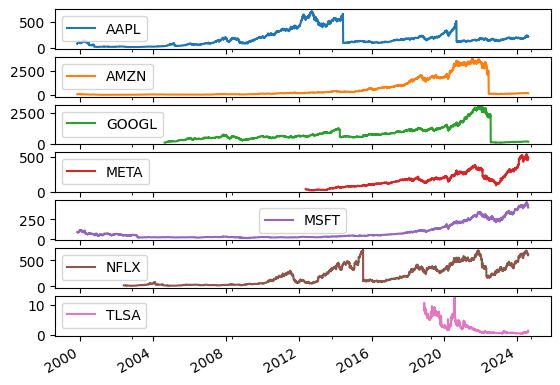

In [37]:
subdf = msdf.pivot(columns='stock', values='close')
subdf.plot.line(subplots=True)